In [2]:
!pip install pillow faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.6 MB/s eta 0:00:00


In [10]:
from PIL import Image, ImageDraw, ImageFont
import random
import textwrap
import os
from IPython.display import display

In [15]:
def generate_receipt(store_name, items, total, output_path):
    width, height = 400, 600
    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype("arial.ttf", 16)
    except:
        font = ImageFont.load_default()

    y = 20
    draw.text((20, y), store_name, font=font, fill="black")
    y += 30
    draw.text((20, y), "--------------------------", font=font, fill="black")
    y += 20

    for item, price in items:
        wrapped_text = textwrap.wrap(item, width=25)
        for line in wrapped_text:
            draw.text((20, y), line, font=font, fill="black")
            y += 20
        draw.text((300, y - 20), f"${price:.2f}", font=font, fill="black")

    y += 20
    draw.text((20, y), "--------------------------", font=font, fill="black")
    y += 20
    draw.text((20, y), f"Total: ${total:.2f}", font=font, fill="black")

    image.save(output_path)
    return image

In [16]:
def create_random_receipt(output_folder="receipts"):
    businesses = {
        "Retail Stores": ["Walmart", "Target", "Best Buy", "IKEA", "GameStop"],
        "Grocery Stores": ["Costco", "Trader Joe's", "Whole Foods", "Loblaws"],
        "Fast Food Chains": ["McDonald's", "Burger King", "Subway", "KFC"],
        "Restaurants": ["Olive Garden", "Red Lobster", "Applebee's"],
        "Bars & Cafés": ["Starbucks", "Tim Hortons", "Dunkin’ Donuts"],
        "Cinemas": ["Cineplex", "AMC Theatres", "Regal Cinemas"],
        "Gas Stations": ["Shell", "Esso", "Chevron"],
        "Tech Stores": ["Apple Store", "Microsoft Store", "Samsung Store"],
        "Pharmacies": ["CVS", "Walgreens", "Shoppers Drug Mart"],
        "Hotels & Travel": ["Marriott", "Hilton", "Uber", "Lyft", "Airbnb"],
        "Pet Stores": ["PetSmart", "Petco"],
    }

    item_catalog = {
        "Retail Stores": ["Laptop", "Smartphone", "Headphones", "Gaming Console"],
        "Grocery Stores": ["Milk", "Bread", "Cheese", "Chicken Breast"],
        "Fast Food Chains": ["Big Mac", "Fries", "Soft Drink", "Chicken Nuggets"],
        "Restaurants": ["Steak Dinner", "Pasta Alfredo", "Caesar Salad"],
        "Bars & Cafés": ["Latte", "Cappuccino", "Beer Pint", "Muffin"],
        "Cinemas": ["Movie Ticket", "Popcorn", "Soft Drink", "Nachos"],
        "Gas Stations": ["Gasoline (Liters)", "Car Wash", "Motor Oil"],
        "Tech Stores": ["MacBook", "iPhone", "Wireless Mouse"],
        "Pharmacies": ["Pain Reliever", "Cough Syrup", "Vitamins"],
        "Hotels & Travel": ["Hotel Stay", "Taxi Ride", "Baggage Fee"],
        "Pet Stores": ["Dog Food", "Cat Litter", "Pet Shampoo"],
    }

    category = random.choice(list(businesses.keys()))
    store_name = random.choice(businesses[category])
    items = random.sample(item_catalog[category], k=random.randint(2, 5))

    item_prices = [(item, round(random.uniform(3, 150), 2)) for item in items]
    total = sum(price for _, price in item_prices)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    receipt_name = f"{store_name.replace(' ', '_')}_receipt.png"
    output_path = os.path.join(output_folder, receipt_name)
    return generate_receipt(store_name, item_prices, total, output_path)

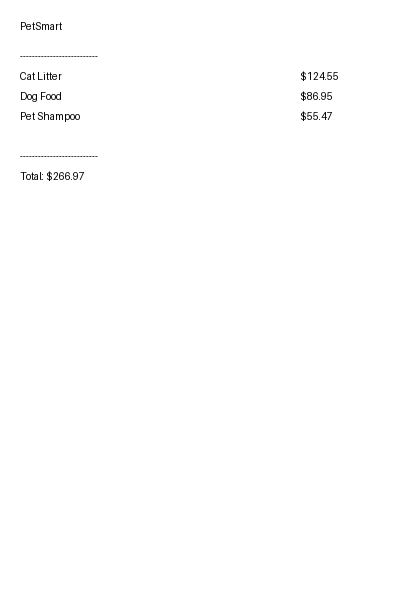

In [33]:
# Generate and display the receipt
receipt_image = create_random_receipt()
display(receipt_image)
